In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [136]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [23]:
from datetime import datetime, timedelta

In [80]:
# Find the most recent date in the data set.
mostrecent = session.query(func.max(Measurement.date)).first()

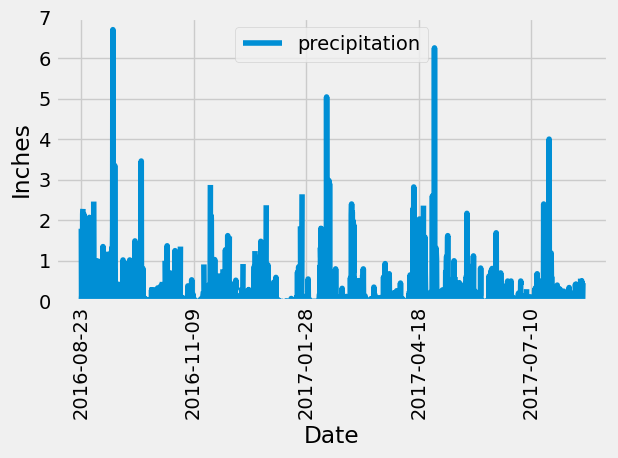

In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mostrecentdate = datetime.strptime(mostrecent[0], "%Y-%m-%d")
# Calculate the date one year from the last date in data set.
oneyearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date >= oneyearago,
    Measurement.date <= mostrecentdate
)
results = scores.all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['date', 'precipitation']
scoresdf = pd.DataFrame(results, columns = columns)
# Sort the dataframe by date
sortscores = scoresdf.sort_values(['date'], ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
sortscores.plot(x='date', y='precipitation')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Inches')
plt.ylim(0,7)
plt.tight_layout()
plt.show()

In [88]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = pd.DataFrame(sortscores["precipitation"].describe())
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station).count()
stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationcount = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stationcount

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [107]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive = stationcount[0][0]
mostactivestats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == mostactive).all()
mostactivestats

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

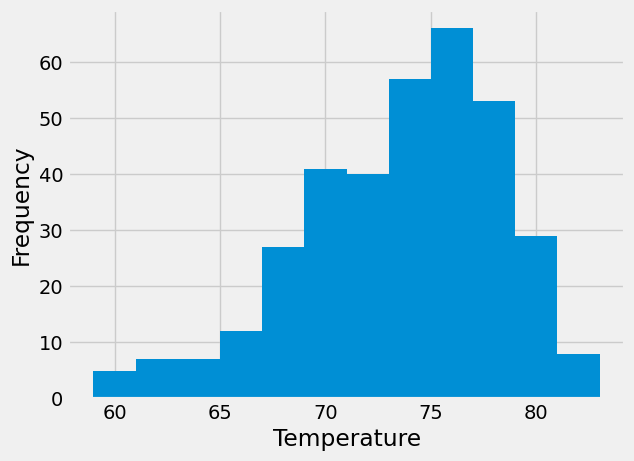

In [137]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearmostactive = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.date >= oneyearago,
    Measurement.station == mostactive
))
plt.hist(yearmostactive['tobs'], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
session.close()